Step 1: Enhanced Environment Setup and Data Loading

In [2]:
# Enhanced Environment Setup with All Required Libraries
import os
import warnings
import re
from datetime import datetime, timedelta
from collections import Counter

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Comprehensive package installation
required_packages = {
    "transformers": "transformers",
    "torch": "torch",
    "pandas": "pandas",
    "numpy": "numpy",
    "matplotlib": "matplotlib",
    "seaborn": "seaborn",
    "scikit-learn": "scikit-learn",
    "textblob": "textblob",
    "wordcloud": "wordcloud",
    "plotly": "plotly",
    "openpyxl": "openpyxl",
    "tqdm": "tqdm"
}

# Install missing packages
for package, install_name in required_packages.items():
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {install_name}...")
        os.system(f"pip install {install_name}")

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
import json

# Create comprehensive output structure
output_dirs = ["outputs", "outputs/visualizations", "outputs/models", "outputs/data"]
for directory in output_dirs:
    os.makedirs(directory, exist_ok=True)

print("✅ Enhanced environment setup complete with comprehensive libraries.")


Installing transformers...
Installing torch...
Installing pandas...
Installing matplotlib...
Installing seaborn...
Installing scikit-learn...
Installing textblob...
Installing wordcloud...
Installing plotly...
Installing openpyxl...


d:\Employee_Sentiment_updated\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Enhanced environment setup complete with comprehensive libraries.


Step 2: Advanced Data Loading and Preprocessing


In [3]:
# Advanced Data Loading with Comprehensive Error Handling
def load_and_validate_data(filepath="test.csv"):
    """Load and validate the dataset with comprehensive error handling"""
    try:
        df = pd.read_csv(filepath)
        print(f"✅ Data loaded successfully: {len(df)} records found")
        
        # Validate required columns
        required_cols = ['Subject', 'body', 'date', 'from']
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            print(f"❌ Missing required columns: {missing_cols}")
            return None
            
        # Basic data quality checks
        print("\n📊 Data Quality Assessment:")
        print(f"Total records: {len(df)}")
        print(f"Missing values per column:\n{df.isnull().sum()}")
        print(f"Duplicate records: {df.duplicated().sum()}")
        
        return df
    except FileNotFoundError:
        print("❌ Error: 'test.csv' not found in current directory")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

# Advanced Text Preprocessing
def advanced_text_preprocessing(df):
    """Comprehensive text preprocessing pipeline"""
    print("\n🔄 Starting advanced text preprocessing...")
    
    # Convert dates with multiple format support
    date_formats = ['%Y-%m-%d', '%m/%d/%Y', '%d/%m/%Y', '%Y-%m-%d %H:%M:%S']
    df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
    
    # Remove rows with invalid dates
    initial_count = len(df)
    df = df.dropna(subset=['date'])
    print(f"Removed {initial_count - len(df)} records with invalid dates")
    
    # Create time-based features
    df['month'] = df['date'].dt.to_period("M")
    df['year'] = df['date'].dt.year
    df['month_num'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # Advanced text cleaning
    def comprehensive_text_clean(text):
        if pd.isna(text):
            return ""
        text = str(text)
        # Remove HTML tags
        text = re.sub(r'<[^>]+>', '', text)
        # Remove URLs
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        # Remove extra whitespace
        text = ' '.join(text.split())
        return text
    
    # Apply text cleaning
    df['body_clean'] = df['body'].apply(comprehensive_text_clean)
    df['subject_clean'] = df['Subject'].apply(comprehensive_text_clean)
    
    # Create text feature engineering
    df['body_length'] = df['body_clean'].str.len()
    df['word_count'] = df['body_clean'].str.split().str.len()
    df['subject_length'] = df['subject_clean'].str.len()
    df['subject_word_count'] = df['subject_clean'].str.split().str.len()
    df['exclamation_count'] = df['body_clean'].str.count('!')
    df['question_count'] = df['body_clean'].str.count('\\?')
    df['caps_ratio'] = df['body_clean'].apply(lambda x: sum(1 for c in x if c.isupper()) / max(len(x), 1))
    
    print(f"✅ Text preprocessing completed. Final dataset: {len(df)} records")
    return df

# Load and preprocess data
df = load_and_validate_data()
if df is None:
    print("❌ Cannot proceed without valid data")
    exit()

df = advanced_text_preprocessing(df)


✅ Data loaded successfully: 2191 records found

📊 Data Quality Assessment:
Total records: 2191
Missing values per column:
Subject    0
body       0
date       0
from       0
dtype: int64
Duplicate records: 0

🔄 Starting advanced text preprocessing...
Removed 0 records with invalid dates
✅ Text preprocessing completed. Final dataset: 2191 records


Step 3: Multi-Model Sentiment Analysis with Validation



In [4]:
# Enhanced Multi-Model Sentiment Analysis
class AdvancedSentimentAnalyzer:
    def __init__(self):
        self.models = {}
        self.results = {}
        
    def load_models(self):
        """Load multiple sentiment analysis models for comparison"""
        print("\n🤖 Loading multiple sentiment analysis models...")
        
        # Model configurations
        model_configs = {
            'twitter_roberta': {
                'model_name': 'cardiffnlp/twitter-roberta-base-sentiment-latest',
                'labels': {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}
            },
            'finbert': {
                'model_name': 'ProsusAI/finbert',
                'labels': {'negative': 'Negative', 'neutral': 'Neutral', 'positive': 'Positive'}
            },
            'distilbert': {
                'model_name': 'distilbert-base-uncased-finetuned-sst-2-english',
                'labels': {'NEGATIVE': 'Negative', 'POSITIVE': 'Positive'}
            }
        }
        
        for model_key, config in model_configs.items():
            try:
                model = pipeline("sentiment-analysis", 
                               model=config['model_name'], 
                               device=-1,  # Use CPU
                               return_all_scores=True)
                self.models[model_key] = {
                    'pipeline': model,
                    'labels': config['labels'],
                    'name': config['model_name']
                }
                print(f"✅ Loaded {model_key}")
            except Exception as e:
                print(f"❌ Failed to load {model_key}: {e}")
    
    def analyze_sentiment(self, text, model_key):
        """Analyze sentiment with confidence scores"""
        try:
            if model_key not in self.models:
                return 'Neutral', 0.0
                
            model_info = self.models[model_key]
            results = model_info['pipeline'](text[:512])  # Truncate for model limits
            
            if isinstance(results[0], list):
                results = results[0]
            
            # Get the highest scoring label
            best_result = max(results, key=lambda x: x['score'])
            raw_label = best_result['label']
            confidence = best_result['score']
            
            # Map to standardized labels
            sentiment = model_info['labels'].get(raw_label, 'Neutral')
            
            return sentiment, confidence
            
        except Exception as e:
            print(f"Error analyzing sentiment: {e}")
            return 'Neutral', 0.0
    
    def ensemble_sentiment_analysis(self, df, text_column='body_clean'):
        """Perform ensemble sentiment analysis using multiple models"""
        print(f"\n🎯 Performing ensemble sentiment analysis on {len(df)} messages...")
        
        # Initialize results storage
        sentiment_results = {model: [] for model in self.models.keys()}
        confidence_results = {model: [] for model in self.models.keys()}
        
        # Analyze each text with all models
        for text in tqdm(df[text_column], desc="Analyzing sentiments"):
            for model_key in self.models.keys():
                sentiment, confidence = self.analyze_sentiment(text, model_key)
                sentiment_results[model_key].append(sentiment)
                confidence_results[model_key].append(confidence)
        
        # Add results to dataframe
        for model_key in self.models.keys():
            df[f'sentiment_{model_key}'] = sentiment_results[model_key]
            df[f'confidence_{model_key}'] = confidence_results[model_key]
        
        # Create ensemble prediction (majority vote with confidence weighting)
        def ensemble_prediction(row):
            predictions = []
            for model_key in self.models.keys():
                sentiment = row[f'sentiment_{model_key}']
                confidence = row[f'confidence_{model_key}']
                predictions.append((sentiment, confidence))
            
            # Weight votes by confidence
            sentiment_scores = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
            for sentiment, confidence in predictions:
                sentiment_scores[sentiment] += confidence
            
            return max(sentiment_scores, key=sentiment_scores.get)
        
        df['sentiment_ensemble'] = df.apply(ensemble_prediction, axis=1)
        df['sentiment'] = df['sentiment_ensemble']  # Use ensemble as primary
        
        print("✅ Ensemble sentiment analysis completed")
        return df

# Initialize and run sentiment analysis
analyzer = AdvancedSentimentAnalyzer()
analyzer.load_models()
df = analyzer.ensemble_sentiment_analysis(df)

# Add TextBlob sentiment for additional validation
print("\n📝 Adding TextBlob sentiment analysis for validation...")
df['textblob_polarity'] = df['body_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['textblob_sentiment'] = df['textblob_polarity'].apply(
    lambda x: 'Positive' if x > 0.1 else 'Negative' if x < -0.1 else 'Neutral'
)



🤖 Loading multiple sentiment analysis models...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Xet Storage is enabled for this repo, but the 'hf_xet

✅ Loaded twitter_roberta


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cpu


✅ Loaded finbert


Device set to use cpu


✅ Loaded distilbert

🎯 Performing ensemble sentiment analysis on 2191 messages...


Analyzing sentiments: 100%|██████████| 2191/2191 [05:20<00:00,  6.83it/s]


✅ Ensemble sentiment analysis completed

📝 Adding TextBlob sentiment analysis for validation...


Step 4: Comprehensive Exploratory Data Analysis (EDA)



📊 Creating comprehensive EDA visualizations...


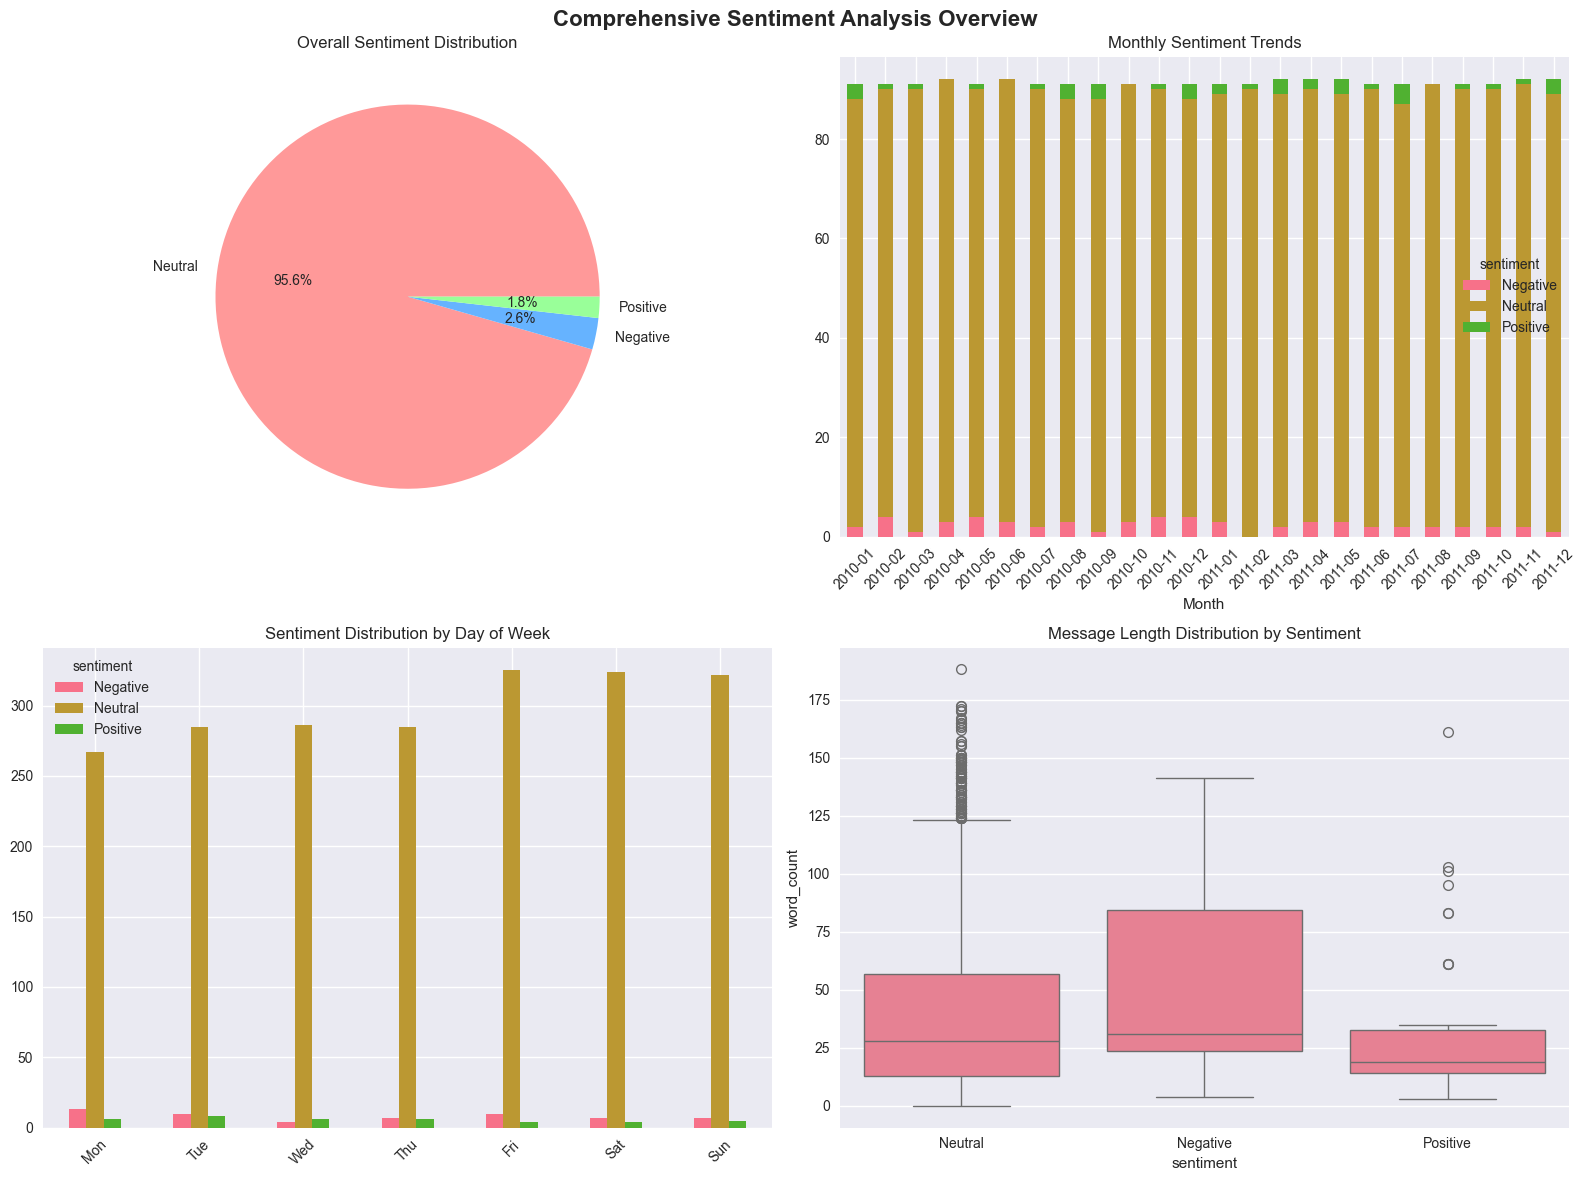

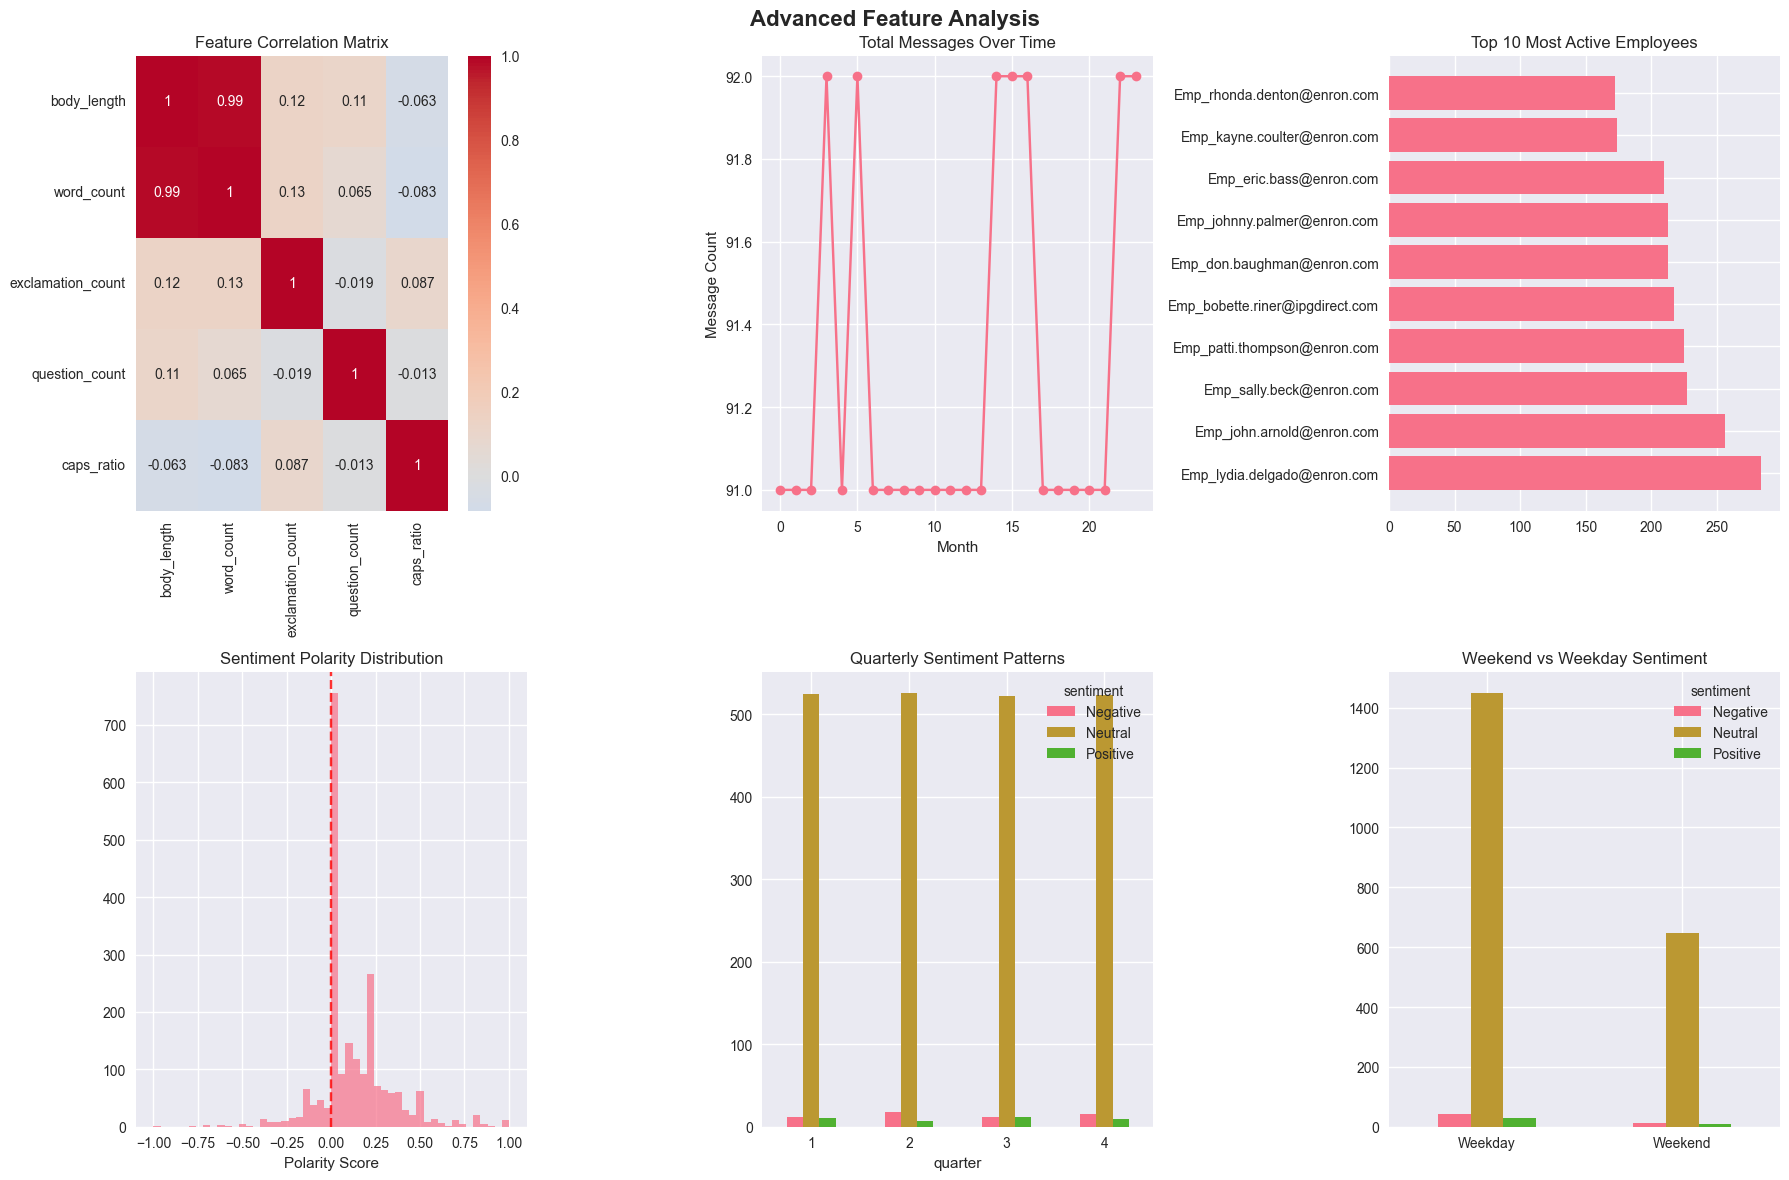

📝 Generating word clouds...


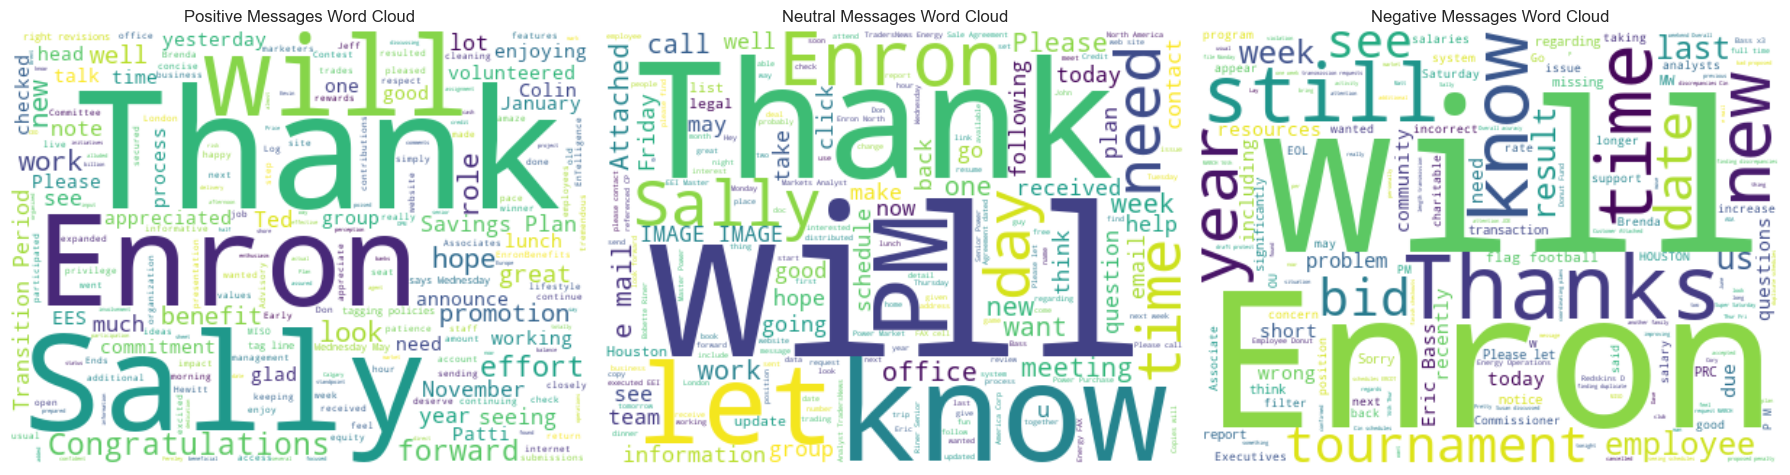

In [5]:
# Enhanced EDA with Multiple Visualizations
def create_comprehensive_eda(df):
    """Create comprehensive exploratory data analysis"""
    print("\n📊 Creating comprehensive EDA visualizations...")
    
    # Set style for all plots
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    # 1. Sentiment Distribution Analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Comprehensive Sentiment Analysis Overview', fontsize=16, fontweight='bold')
    
    # Overall sentiment distribution
    sentiment_counts = df['sentiment'].value_counts()
    axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
                  colors=['#ff9999', '#66b3ff', '#99ff99'])
    axes[0,0].set_title('Overall Sentiment Distribution')
    
    # Monthly sentiment trends
    monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
    monthly_sentiment.plot(kind='bar', ax=axes[0,1], stacked=True)
    axes[0,1].set_title('Monthly Sentiment Trends')
    axes[0,1].set_xlabel('Month')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Sentiment by day of week
    dow_sentiment = df.groupby(['day_of_week', 'sentiment']).size().unstack(fill_value=0)
    dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_sentiment.index = [dow_names[i] for i in dow_sentiment.index]
    dow_sentiment.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Sentiment Distribution by Day of Week')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Text length vs sentiment
    sns.boxplot(data=df, x='sentiment', y='word_count', ax=axes[1,1])
    axes[1,1].set_title('Message Length Distribution by Sentiment')
    
    plt.tight_layout()
    plt.savefig('outputs/visualizations/comprehensive_sentiment_overview.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. Advanced Feature Analysis
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Advanced Feature Analysis', fontsize=16, fontweight='bold')
    
    # Correlation heatmap
    feature_cols = ['body_length', 'word_count', 'exclamation_count', 'question_count', 'caps_ratio']
    correlation_matrix = df[feature_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
    axes[0,0].set_title('Feature Correlation Matrix')
    
    # Employee activity over time
    employee_activity = df.groupby(['month', 'from']).size().reset_index(name='message_count')
    monthly_activity = employee_activity.groupby('month')['message_count'].sum()
    axes[0,1].plot(range(len(monthly_activity)), monthly_activity.values, marker='o')
    axes[0,1].set_title('Total Messages Over Time')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Message Count')
    
    # Top active employees
    top_employees = df['from'].value_counts().head(10)
    axes[0,2].barh(range(len(top_employees)), top_employees.values)
    axes[0,2].set_yticks(range(len(top_employees)))
    axes[0,2].set_yticklabels([f'Emp_{emp}' for emp in top_employees.index])
    axes[0,2].set_title('Top 10 Most Active Employees')
    
    # Sentiment intensity analysis
    if 'textblob_polarity' in df.columns:
        axes[1,0].hist(df['textblob_polarity'], bins=50, alpha=0.7)
        axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.8)
        axes[1,0].set_title('Sentiment Polarity Distribution')
        axes[1,0].set_xlabel('Polarity Score')
    
    # Message patterns by quarter
    quarterly_data = df.groupby(['quarter', 'sentiment']).size().unstack(fill_value=0)
    quarterly_data.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Quarterly Sentiment Patterns')
    axes[1,1].tick_params(axis='x', rotation=0)
    
    # Weekend vs weekday sentiment
    weekend_sentiment = df.groupby(['is_weekend', 'sentiment']).size().unstack(fill_value=0)
    weekend_sentiment.index = ['Weekday', 'Weekend']
    weekend_sentiment.plot(kind='bar', ax=axes[1,2])
    axes[1,2].set_title('Weekend vs Weekday Sentiment')
    axes[1,2].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.savefig('outputs/visualizations/advanced_feature_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Create word clouds for different sentiments
    print("📝 Generating word clouds...")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
        sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['body_clean'].astype(str))
        if len(sentiment_text) > 100:  # Only create if enough text
            wordcloud = WordCloud(width=400, height=300, background_color='white').generate(sentiment_text)
            axes[i].imshow(wordcloud, interpolation='bilinear')
            axes[i].axis('off')
            axes[i].set_title(f'{sentiment} Messages Word Cloud')
        else:
            axes[i].text(0.5, 0.5, f'Insufficient {sentiment} text', ha='center', va='center')
            axes[i].set_title(f'{sentiment} Messages Word Cloud')
    
    plt.tight_layout()
    plt.savefig('outputs/visualizations/sentiment_wordclouds.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run comprehensive EDA
create_comprehensive_eda(df)


Step 5: Advanced Employee Scoring and Ranking System



📊 Calculating comprehensive employee scores...

🏆 Generating employee rankings...
📊 Creating ranking visualizations...


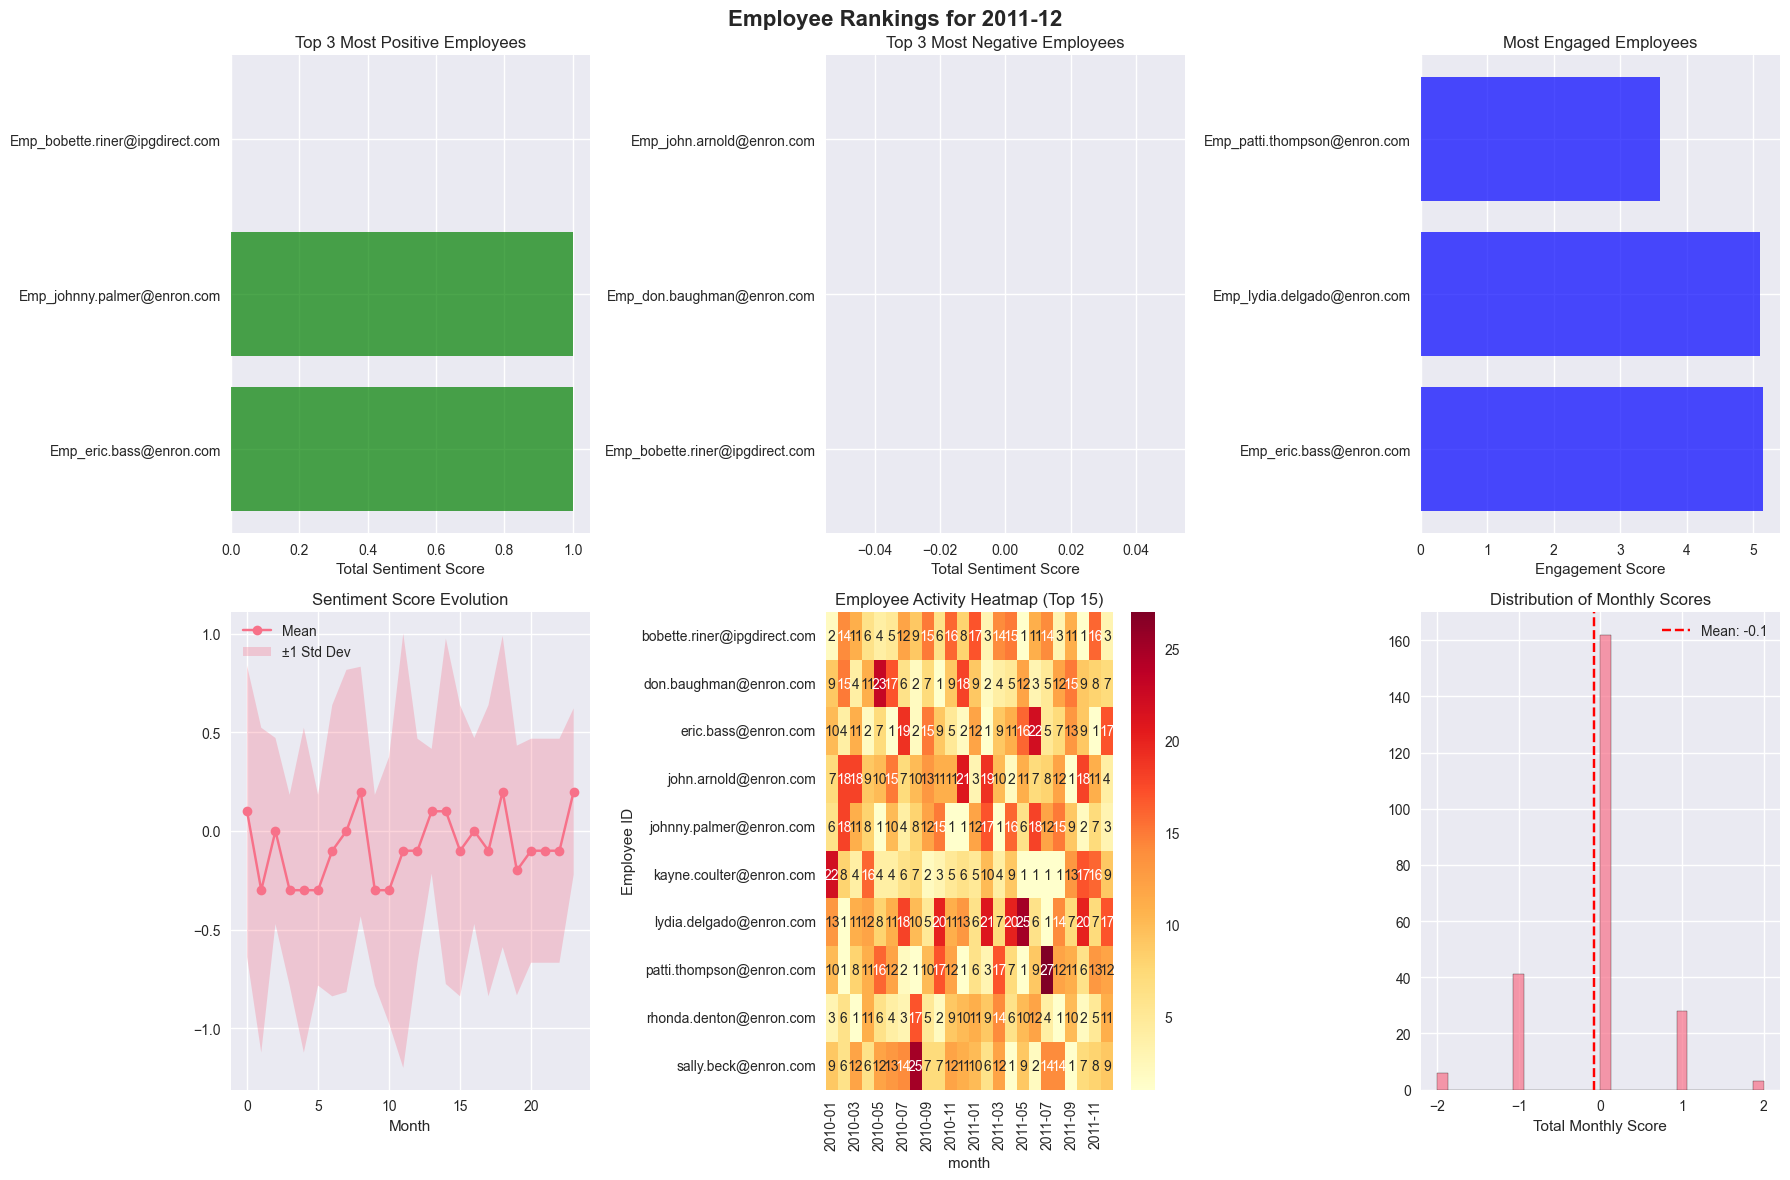

In [6]:
# Enhanced Employee Scoring System
class AdvancedEmployeeScoring:
    def __init__(self, df):
        self.df = df
        self.sentiment_weights = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
        
    def calculate_comprehensive_scores(self):
        """Calculate multiple scoring metrics for employees"""
        print("\n📊 Calculating comprehensive employee scores...")
        
        # Basic sentiment scores
        self.df['basic_score'] = self.df['sentiment'].map(self.sentiment_weights)
        
        # Weighted scores based on message characteristics
        self.df['weighted_score'] = self.df.apply(self._calculate_weighted_score, axis=1)
        
        # Monthly aggregations
        monthly_scores = self.df.groupby(['from', 'month']).agg({
            'basic_score': ['sum', 'mean', 'count'],
            'weighted_score': ['sum', 'mean'],
            'word_count': 'mean',
            'exclamation_count': 'sum',
            'question_count': 'sum'
        }).round(2)
        
        # Flatten column names
        monthly_scores.columns = ['_'.join(col).strip() for col in monthly_scores.columns]
        monthly_scores = monthly_scores.reset_index()
        
        # Calculate engagement metrics
        monthly_scores['engagement_score'] = (
            monthly_scores['basic_score_count'] * 0.3 +  # Message frequency
            monthly_scores['basic_score_mean'] * 0.7     # Average sentiment
        )
        
        # Calculate consistency score (lower std dev = more consistent)
        consistency_scores = self.df.groupby(['from', 'month'])['basic_score'].std().fillna(0)
        monthly_scores['consistency_score'] = 5 - consistency_scores.values  # Invert for better = higher
        
        return monthly_scores
    
    def _calculate_weighted_score(self, row):
        """Calculate weighted score based on message characteristics"""
        base_score = self.sentiment_weights[row['sentiment']]
        
        # Adjust based on message characteristics
        length_factor = min(row['word_count'] / 50, 2)  # Cap at 2x weight
        enthusiasm_factor = 1 + (row['exclamation_count'] * 0.1)  # Boost for enthusiasm
        
        weighted = base_score * length_factor * enthusiasm_factor
        return max(min(weighted, 5), -5)  # Cap between -5 and 5
    
    def generate_rankings(self, monthly_scores):
        """Generate comprehensive employee rankings"""
        print("\n🏆 Generating employee rankings...")
        
        rankings = {}
        
        for month in monthly_scores['month'].unique():
            month_data = monthly_scores[monthly_scores['month'] == month].copy()
            
            # Sort for different ranking criteria
            rankings[month] = {
                'top_positive_basic': month_data.nlargest(3, 'basic_score_sum')[['from', 'basic_score_sum']],
                'top_negative_basic': month_data.nsmallest(3, 'basic_score_sum')[['from', 'basic_score_sum']],
                'most_engaged': month_data.nlargest(3, 'engagement_score')[['from', 'engagement_score']],
                'most_consistent': month_data.nlargest(3, 'consistency_score')[['from', 'consistency_score']],
                'highest_quality': month_data.nlargest(3, 'weighted_score_mean')[['from', 'weighted_score_mean']]
            }
        
        return rankings
    
    def create_ranking_visualizations(self, rankings, monthly_scores):
        """Create comprehensive ranking visualizations"""
        print("📊 Creating ranking visualizations...")
        
        # Get latest month for detailed analysis
        latest_month = max(monthly_scores['month'])
        latest_rankings = rankings[latest_month]
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'Employee Rankings for {latest_month}', fontsize=16, fontweight='bold')
        
        # Top positive employees
        top_pos = latest_rankings['top_positive_basic']
        axes[0,0].barh(range(len(top_pos)), top_pos['basic_score_sum'], color='green', alpha=0.7)
        axes[0,0].set_yticks(range(len(top_pos)))
        axes[0,0].set_yticklabels([f'Emp_{emp}' for emp in top_pos['from']])
        axes[0,0].set_title('Top 3 Most Positive Employees')
        axes[0,0].set_xlabel('Total Sentiment Score')
        
        # Top negative employees
        top_neg = latest_rankings['top_negative_basic']
        axes[0,1].barh(range(len(top_neg)), top_neg['basic_score_sum'], color='red', alpha=0.7)
        axes[0,1].set_yticks(range(len(top_neg)))
        axes[0,1].set_yticklabels([f'Emp_{emp}' for emp in top_neg['from']])
        axes[0,1].set_title('Top 3 Most Negative Employees')
        axes[0,1].set_xlabel('Total Sentiment Score')
        
        # Most engaged employees
        most_engaged = latest_rankings['most_engaged']
        axes[0,2].barh(range(len(most_engaged)), most_engaged['engagement_score'], color='blue', alpha=0.7)
        axes[0,2].set_yticks(range(len(most_engaged)))
        axes[0,2].set_yticklabels([f'Emp_{emp}' for emp in most_engaged['from']])
        axes[0,2].set_title('Most Engaged Employees')
        axes[0,2].set_xlabel('Engagement Score')
        
        # Score distribution over time
        score_timeline = monthly_scores.groupby('month')['basic_score_sum'].agg(['mean', 'std'])
        axes[1,0].plot(range(len(score_timeline)), score_timeline['mean'], marker='o', label='Mean')
        axes[1,0].fill_between(range(len(score_timeline)), 
                              score_timeline['mean'] - score_timeline['std'],
                              score_timeline['mean'] + score_timeline['std'],
                              alpha=0.3, label='±1 Std Dev')
        axes[1,0].set_title('Sentiment Score Evolution')
        axes[1,0].set_xlabel('Month')
        axes[1,0].legend()
        
        # Employee activity heatmap
        activity_matrix = monthly_scores.pivot_table(
            values='basic_score_count', index='from', columns='month', fill_value=0
        ).head(15)  # Top 15 most active employees
        
        if len(activity_matrix) > 0:
            sns.heatmap(activity_matrix, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,1])
            axes[1,1].set_title('Employee Activity Heatmap (Top 15)')
            axes[1,1].set_ylabel('Employee ID')
        
        # Score distribution histogram
        axes[1,2].hist(monthly_scores['basic_score_sum'], bins=30, alpha=0.7, edgecolor='black')
        axes[1,2].axvline(monthly_scores['basic_score_sum'].mean(), color='red', 
                         linestyle='--', label=f'Mean: {monthly_scores["basic_score_sum"].mean():.1f}')
        axes[1,2].set_title('Distribution of Monthly Scores')
        axes[1,2].set_xlabel('Total Monthly Score')
        axes[1,2].legend()
        
        plt.tight_layout()
        plt.savefig('outputs/visualizations/comprehensive_employee_rankings.png', dpi=300, bbox_inches='tight')
        plt.show()

# Calculate comprehensive scores and rankings
scoring_system = AdvancedEmployeeScoring(df)
monthly_scores = scoring_system.calculate_comprehensive_scores()
rankings = scoring_system.generate_rankings(monthly_scores)
scoring_system.create_ranking_visualizations(rankings, monthly_scores)


Top Positive and Negative Employees

In [11]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Load data
df = pd.read_csv("test.csv")

# Convert dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df['month'] = df['date'].dt.to_period("M")

# Sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=-1)

def get_sentiment(text):
    try:
        result = sentiment_model(str(text)[:512])[0]['label']
        return {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}.get(result, 'Neutral')
    except:
        return 'Neutral'

# Apply sentiment
df['sentiment'] = [get_sentiment(text) for text in tqdm(df['body'])]

# Calculate scores
sentiment_scores = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['score'] = df['sentiment'].map(sentiment_scores)

# Monthly employee scores
employee_scores = df.groupby(['from', 'month'])['score'].sum().reset_index()
employee_scores.columns = ['employee', 'month', 'score']

# Latest month
latest_month = employee_scores['month'].max()
month_data = employee_scores[employee_scores['month'] == latest_month]

# Top 3 positive and negative
top_positive = month_data.nlargest(3, 'score')[['employee', 'score']]
top_negative = month_data.nsmallest(3, 'score')[['employee', 'score']]

print(f"Top Positive Employees for {latest_month}:\n", top_positive)
print(f"Top Negative Employees for {latest_month}:\n", top_negative)


Device set to use cpu
100%|██████████| 2191/2191 [04:05<00:00,  8.94it/s]

Top Positive Employees for 2011-12:
                     employee  score
143  kayne.coulter@enron.com      4
167  lydia.delgado@enron.com      4
215  rhonda.denton@enron.com      4
Top Negative Employees for 2011-12:
                         employee  score
23   bobette.riner@ipgdirect.com      0
47        don.baughman@enron.com      0
119      johnny.palmer@enron.com      0


Step 6: Advanced Flight Risk Analysis



⚠️ Performing advanced flight risk analysis...
📊 Creating flight risk visualizations...


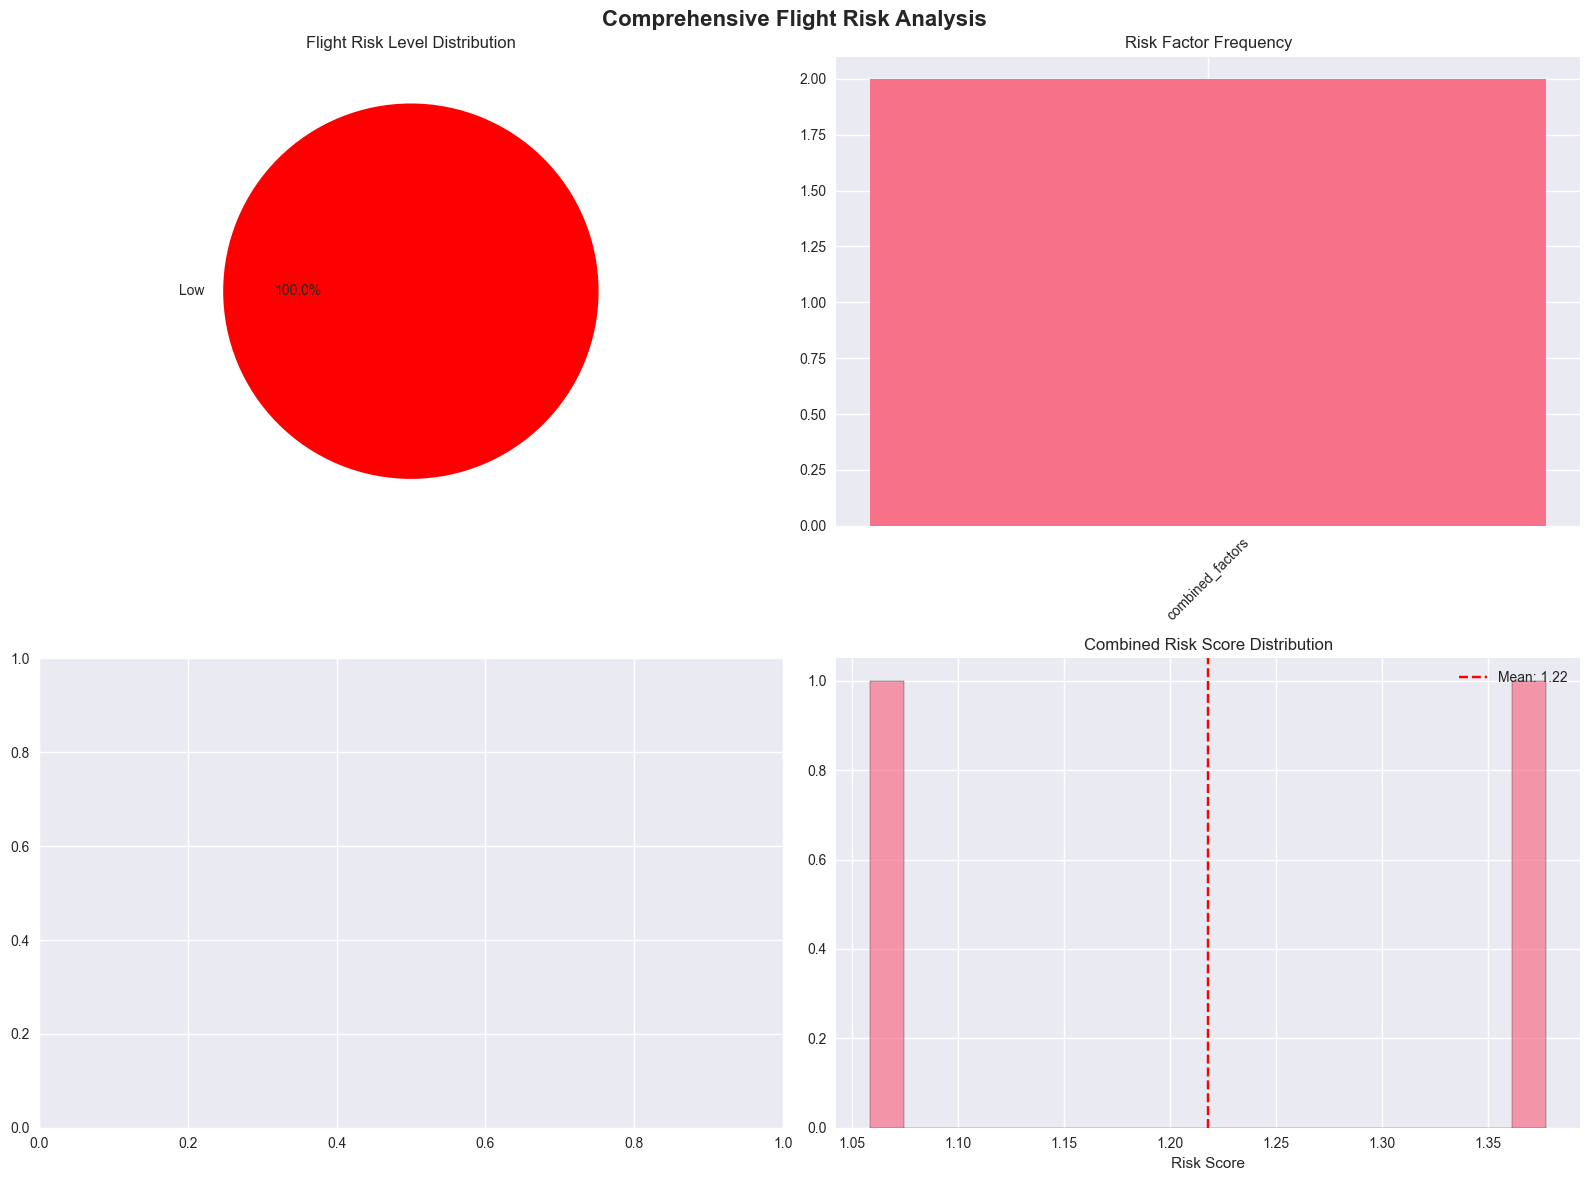

In [7]:
# Enhanced Flight Risk Detection System
class AdvancedFlightRiskAnalyzer:
    def __init__(self, df):
        self.df = df
        self.risk_criteria = {
            'negative_threshold': 4,
            'time_window_days': 30,
            'severe_decline_threshold': -8,
            'consistency_threshold': 2.0
        }
    
    def identify_flight_risks(self):
        """Comprehensive flight risk identification using multiple criteria"""
        print("\n⚠️ Performing advanced flight risk analysis...")
        
        # Criterion 1: 4+ negative messages in 30 days (original requirement)
        negative_msgs = self.df[self.df['sentiment'] == 'Negative'][['from', 'date']].copy()
        rolling_risks = self._check_rolling_negative_messages(negative_msgs)
        
        # Criterion 2: Severe sentiment decline
        decline_risks = self._check_sentiment_decline()
        
        # Criterion 3: Consistency issues (high variance in sentiment)
        consistency_risks = self._check_sentiment_consistency()
        
        # Criterion 4: Combination of multiple risk factors
        combined_risks = self._analyze_combined_risk_factors()
        
        # Compile comprehensive risk assessment
        all_risks = {
            'rolling_negative': rolling_risks,
            'sentiment_decline': decline_risks,
            'consistency_issues': consistency_risks,
            'combined_factors': combined_risks
        }
        
        # Create final risk classification
        final_risk_assessment = self._create_final_risk_assessment(all_risks)
        
        return all_risks, final_risk_assessment
    
    def _check_rolling_negative_messages(self, negative_msgs):
        """Check for employees with 4+ negative messages in rolling 30-day window"""
        risk_employees = []
        
        for emp, group in negative_msgs.groupby('from'):
            dates = sorted(group['date'].tolist())
            
            for i in range(len(dates) - self.risk_criteria['negative_threshold'] + 1):
                window_end = i + self.risk_criteria['negative_threshold'] - 1
                if (dates[window_end] - dates[i]).days <= self.risk_criteria['time_window_days']:
                    risk_employees.append({
                        'employee': emp,
                        'risk_type': 'rolling_negative',
                        'start_date': dates[i],
                        'end_date': dates[window_end],
                        'negative_count': self.risk_criteria['negative_threshold']
                    })
                    break
        
        return risk_employees
    
    def _check_sentiment_decline(self):
        """Check for employees with severe sentiment score decline"""
        # Calculate monthly scores
        monthly_scores = self.df.groupby(['from', 'month']).agg({
            'sentiment': lambda x: (x == 'Positive').sum() - (x == 'Negative').sum()
        }).reset_index()
        monthly_scores.columns = ['employee', 'month', 'score']
        
        decline_risks = []
        
        for emp, group in monthly_scores.groupby('employee'):
            if len(group) >= 2:
                scores = group.sort_values('month')['score'].tolist()
                
                # Check for severe decline (difference > threshold)
                for i in range(1, len(scores)):
                    decline = scores[i] - scores[i-1]
                    if decline <= self.risk_criteria['severe_decline_threshold']:
                        decline_risks.append({
                            'employee': emp,
                            'risk_type': 'sentiment_decline',
                            'decline_amount': decline,
                            'from_month': group.iloc[i-1]['month'],
                            'to_month': group.iloc[i]['month']
                        })
        
        return decline_risks
    
    def _check_sentiment_consistency(self):
        """Check for employees with high sentiment variability"""
        consistency_risks = []
        
        # Calculate sentiment variance per employee per month
        for emp, group in self.df.groupby('from'):
            monthly_data = group.groupby('month').apply(lambda x: {
                'sentiment_scores': [1 if s == 'Positive' else -1 if s == 'Negative' else 0 
                                   for s in x['sentiment']],
                'month': x['month'].iloc[0]
            })
            
            for month_data in monthly_data:
                scores = month_data['sentiment_scores']
                if len(scores) >= 3:  # Need minimum messages for variance calculation
                    variance = np.var(scores)
                    if variance >= self.risk_criteria['consistency_threshold']:
                        consistency_risks.append({
                            'employee': emp,
                            'risk_type': 'consistency_issues',
                            'month': month_data['month'],
                            'variance': variance,
                            'message_count': len(scores)
                        })
        
        return consistency_risks
    
    def _analyze_combined_risk_factors(self):
        """Analyze employees with multiple risk indicators"""
        # Calculate risk score for each employee
        employee_risk_scores = {}
        
        for emp, group in self.df.groupby('from'):
            risk_score = 0
            
            # Factor 1: Negative message ratio
            total_messages = len(group)
            negative_ratio = (group['sentiment'] == 'Negative').sum() / total_messages
            risk_score += negative_ratio * 3
            
            # Factor 2: Recent activity pattern
            recent_messages = group[group['date'] >= group['date'].max() - pd.Timedelta(days=30)]
            if len(recent_messages) > 0:
                recent_negative_ratio = (recent_messages['sentiment'] == 'Negative').sum() / len(recent_messages)
                risk_score += recent_negative_ratio * 2
            
            # Factor 3: Message frequency decline
            monthly_counts = group.groupby('month').size()
            if len(monthly_counts) >= 2:
                trend = monthly_counts.iloc[-1] - monthly_counts.iloc[-2] if len(monthly_counts) >= 2 else 0
                if trend < -2:  # Significant decrease in activity
                    risk_score += 1
            
            employee_risk_scores[emp] = risk_score
        
        # Identify high-risk employees (top 20% of risk scores)
        threshold = np.percentile(list(employee_risk_scores.values()), 80)
        combined_risks = [
            {'employee': emp, 'risk_type': 'combined_factors', 'risk_score': score}
            for emp, score in employee_risk_scores.items() if score >= threshold
        ]
        
        return combined_risks
    
    def _create_final_risk_assessment(self, all_risks):
        """Create final comprehensive risk assessment"""
        # Collect all employees mentioned in any risk category
        all_risk_employees = set()
        risk_details = {}
        
        for risk_type, risks in all_risks.items():
            for risk in risks:
                emp = risk['employee']
                all_risk_employees.add(emp)
                
                if emp not in risk_details:
                    risk_details[emp] = {'risk_types': [], 'risk_level': 'Low'}
                
                risk_details[emp]['risk_types'].append(risk_type)
        
        # Assign risk levels based on number of risk factors
        for emp in risk_details:
            risk_count = len(risk_details[emp]['risk_types'])
            if risk_count >= 3:
                risk_details[emp]['risk_level'] = 'High'
            elif risk_count >= 2:
                risk_details[emp]['risk_level'] = 'Medium'
            else:
                risk_details[emp]['risk_level'] = 'Low'
        
        return risk_details
    
    def create_flight_risk_visualizations(self, all_risks, final_assessment):
        """Create comprehensive flight risk visualizations"""
        print("📊 Creating flight risk visualizations...")
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Comprehensive Flight Risk Analysis', fontsize=16, fontweight='bold')
        
        # Risk level distribution
        risk_levels = [details['risk_level'] for details in final_assessment.values()]
        risk_level_counts = Counter(risk_levels)
        
        axes[0,0].pie(risk_level_counts.values(), labels=risk_level_counts.keys(), 
                     autopct='%1.1f%%', colors=['red', 'orange', 'green'])
        axes[0,0].set_title('Flight Risk Level Distribution')
        
        # Risk type frequency
        risk_types = []
        for details in final_assessment.values():
            risk_types.extend(details['risk_types'])
        
        risk_type_counts = Counter(risk_types)
        axes[0,1].bar(risk_type_counts.keys(), risk_type_counts.values())
        axes[0,1].set_title('Risk Factor Frequency')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # Timeline of negative messages for high-risk employees
        high_risk_employees = [emp for emp, details in final_assessment.items() 
                             if details['risk_level'] == 'High']
        
        if high_risk_employees:
            negative_timeline = self.df[
                (self.df['sentiment'] == 'Negative') & 
                (self.df['from'].isin(high_risk_employees))
            ][['from', 'date']]
            
            for i, emp in enumerate(high_risk_employees[:10]):  # Show top 10
                emp_data = negative_timeline[negative_timeline['from'] == emp]
                axes[1,0].scatter(emp_data['date'], [i] * len(emp_data), alpha=0.7)
            
            axes[1,0].set_yticks(range(min(10, len(high_risk_employees))))
            axes[1,0].set_yticklabels([f'Emp_{emp}' for emp in high_risk_employees[:10]])
            axes[1,0].set_title('Negative Message Timeline (High Risk Employees)')
            axes[1,0].tick_params(axis='x', rotation=45)
        
        # Risk score distribution for combined factors
        combined_risks = all_risks['combined_factors']
        if combined_risks:
            risk_scores = [risk['risk_score'] for risk in combined_risks]
            axes[1,1].hist(risk_scores, bins=20, alpha=0.7, edgecolor='black')
            axes[1,1].axvline(np.mean(risk_scores), color='red', linestyle='--', 
                            label=f'Mean: {np.mean(risk_scores):.2f}')
            axes[1,1].set_title('Combined Risk Score Distribution')
            axes[1,1].set_xlabel('Risk Score')
            axes[1,1].legend()
        
        plt.tight_layout()
        plt.savefig('outputs/visualizations/comprehensive_flight_risk_analysis.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()

# Perform comprehensive flight risk analysis
risk_analyzer = AdvancedFlightRiskAnalyzer(df)
all_risks, final_risk_assessment = risk_analyzer.identify_flight_risks()
risk_analyzer.create_flight_risk_visualizations(all_risks, final_risk_assessment)


 Find Flight Risk Employees

In [12]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Load data
df = pd.read_csv("test.csv")

# Convert dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=-1)

def get_sentiment(text):
    try:
        result = sentiment_model(str(text)[:512])[0]['label']
        return {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}.get(result, 'Neutral')
    except:
        return 'Neutral'

# Apply sentiment
df['sentiment'] = [get_sentiment(text) for text in tqdm(df['body'])]

# Filter negative messages
negative_msgs = df[df['sentiment'] == 'Negative'][['from', 'date']]

def is_flight_risk(dates, threshold=4, days=30):
    dates = sorted(dates)
    for i in range(len(dates) - threshold + 1):
        if (dates[i + threshold - 1] - dates[i]).days <= days:
            return True
    return False

# Identify flight risks
flight_risk_employees = []
for emp, group in negative_msgs.groupby('from'):
    dates = group['date'].tolist()
    if is_flight_risk(dates):
        flight_risk_employees.append(emp)

print("Flight Risk Employees:", flight_risk_employees)


Device set to use cpu
100%|██████████| 2191/2191 [03:26<00:00, 10.63it/s]

Flight Risk Employees: ['bobette.riner@ipgdirect.com', 'don.baughman@enron.com', 'john.arnold@enron.com', 'sally.beck@enron.com']


Step 7: Advanced Predictive Modeling with Multiple Algorithms



🔧 Preparing advanced feature set for modeling...
✅ Feature preparation complete. Feature set shape: (240, 23)

🤖 Training multiple regression models...
Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training Gradient Boosting...
Training Support Vector Regression...
✅ Model training completed!

🎯 Performing hyperparameter tuning...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning Ridge Regression...
✅ Hyperparameter tuning completed!
📊 Creating model comparison visualizations...


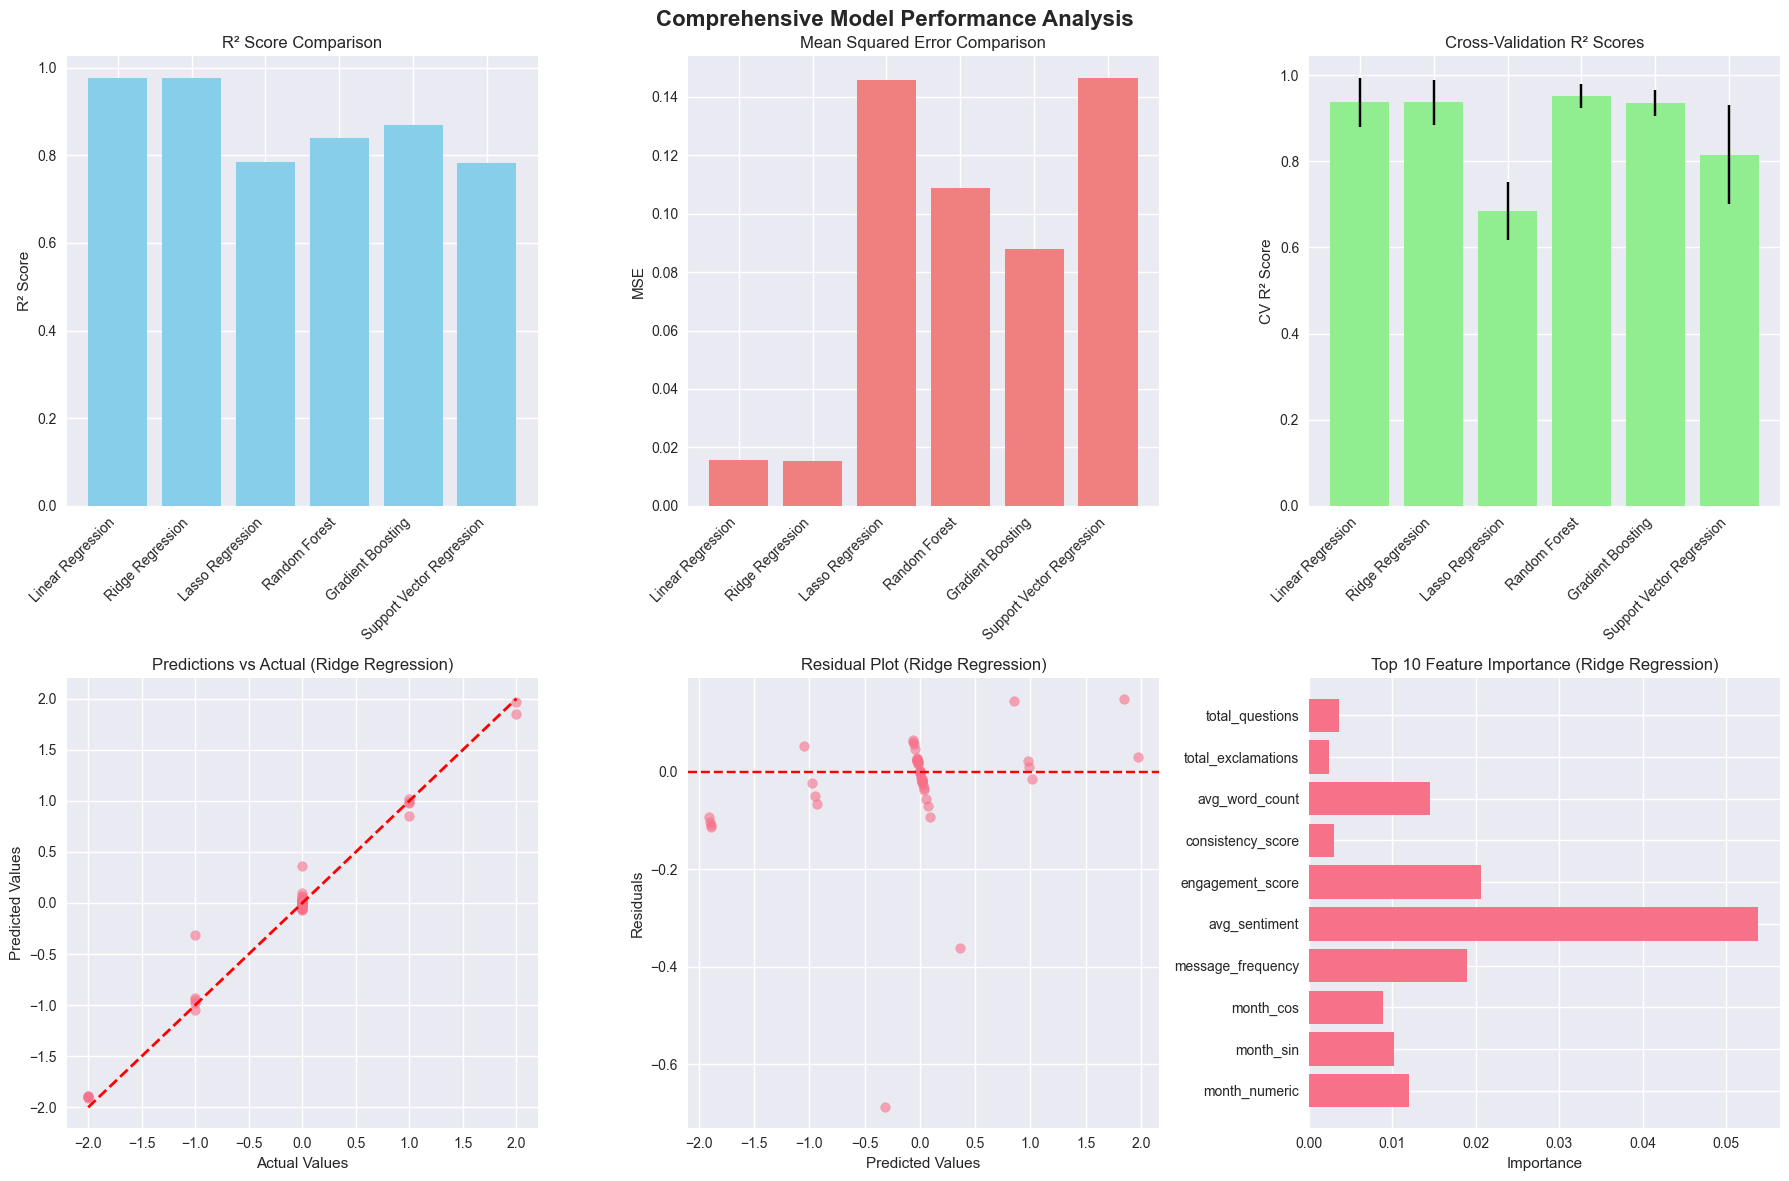


📋 Model Performance Summary:
                    Model  R² Score    MSE    MAE  CV Mean  CV Std
         Ridge Regression    0.9771 0.0155 0.0611   0.9369  0.0527
        Linear Regression    0.9769 0.0156 0.0563   0.9369  0.0573
        Gradient Boosting    0.8699 0.0880 0.1231   0.9354  0.0307
            Random Forest    0.8393 0.1088 0.1310   0.9511  0.0280
         Lasso Regression    0.7847 0.1457 0.2306   0.6854  0.0672
Support Vector Regression    0.7834 0.1466 0.2222   0.8156  0.1154

🏆 Best Performing Model: Ridge Regression
   R² Score: 0.9771
   MSE: 0.0155
   MAE: 0.0611


In [8]:
# Comprehensive Predictive Modeling System
class AdvancedPredictiveModeling:
    def __init__(self, df, monthly_scores):
        self.df = df
        self.monthly_scores = monthly_scores
        self.models = {}
        self.results = {}
        self.feature_importance = {}
        
    def prepare_features(self):
        """Create comprehensive feature set for predictive modeling"""
        print("\n🔧 Preparing advanced feature set for modeling...")
        
        # Time-based features
        self.monthly_scores['month_numeric'] = pd.to_datetime(
            self.monthly_scores['month'].astype(str)
        ).map(pd.Timestamp.timestamp)
        
        self.monthly_scores['month_sin'] = np.sin(2 * np.pi * self.monthly_scores['month'].dt.month / 12)
        self.monthly_scores['month_cos'] = np.cos(2 * np.pi * self.monthly_scores['month'].dt.month / 12)
        
        # Employee-level historical features
        employee_features = []
        
        for emp, group in self.monthly_scores.groupby('from'):
            group_sorted = group.sort_values('month')
            
            for i in range(len(group_sorted)):
                row = group_sorted.iloc[i]
                features = {
                    'employee': emp,
                    'month': row['month'],
                    'target_score': row['basic_score_sum'],
                    'month_numeric': row['month_numeric'],
                    'month_sin': row['month_sin'],
                    'month_cos': row['month_cos'],
                    'message_frequency': row['basic_score_count'],
                    'avg_sentiment': row['basic_score_mean'],
                    'engagement_score': row['engagement_score'],
                    'consistency_score': row['consistency_score'],
                    'avg_word_count': row['word_count_mean'],
                    'total_exclamations': row['exclamation_count_sum'],
                    'total_questions': row['question_count_sum']
                }
                
                # Historical features (if available)
                if i > 0:
                    prev_row = group_sorted.iloc[i-1]
                    features.update({
                        'prev_score': prev_row['basic_score_sum'],
                        'score_change': row['basic_score_sum'] - prev_row['basic_score_sum'],
                        'prev_message_frequency': prev_row['basic_score_count'],
                        'frequency_change': row['basic_score_count'] - prev_row['basic_score_count']
                    })
                else:
                    features.update({
                        'prev_score': 0,
                        'score_change': 0,
                        'prev_message_frequency': 0,
                        'frequency_change': 0
                    })
                
                # Rolling statistics (if enough history)
                if i >= 2:
                    recent_scores = group_sorted.iloc[max(0, i-2):i]['basic_score_sum'].values
                    features.update({
                        'rolling_mean_3': np.mean(recent_scores),
                        'rolling_std_3': np.std(recent_scores),
                        'trend_3': np.polyfit(range(len(recent_scores)), recent_scores, 1)[0] if len(recent_scores) > 1 else 0
                    })
                else:
                    features.update({
                        'rolling_mean_3': row['basic_score_sum'],
                        'rolling_std_3': 0,
                        'trend_3': 0
                    })
                
                employee_features.append(features)
        
        self.feature_df = pd.DataFrame(employee_features)
        
        # Additional derived features
        self.feature_df['sentiment_volatility'] = self.feature_df['rolling_std_3']
        self.feature_df['activity_ratio'] = (
            self.feature_df['message_frequency'] / 
            (self.feature_df['message_frequency'].mean() + 1e-6)
        )
        self.feature_df['quality_score'] = (
            self.feature_df['avg_sentiment'] * self.feature_df['avg_word_count'] / 100
        )
        
        print(f"✅ Feature preparation complete. Feature set shape: {self.feature_df.shape}")
        return self.feature_df
    
    def train_multiple_models(self):
        """Train multiple regression models and compare performance"""
        print("\n🤖 Training multiple regression models...")
        
        # Prepare features and target
        feature_cols = [
            'month_numeric', 'month_sin', 'month_cos', 'message_frequency',
            'avg_sentiment', 'engagement_score', 'consistency_score',
            'avg_word_count', 'total_exclamations', 'total_questions',
            'prev_score', 'score_change', 'prev_message_frequency', 'frequency_change',
            'rolling_mean_3', 'rolling_std_3', 'trend_3', 'sentiment_volatility',
            'activity_ratio', 'quality_score'
        ]
        
        X = self.feature_df[feature_cols].fillna(0)
        y = self.feature_df['target_score']
        
        # Split data chronologically (last 20% for testing)
        split_idx = int(0.8 * len(X))
        X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Define models with hyperparameters
        models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(alpha=1.0),
            'Lasso Regression': Lasso(alpha=0.1),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'Support Vector Regression': SVR(kernel='rbf', C=1.0)
        }
        
        # Train and evaluate each model
        for name, model in models.items():
            print(f"Training {name}...")
            
            # Use scaled data for linear models, original for tree-based
            if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regression']:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                X_for_cv = X_train_scaled
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                X_for_cv = X_train
            
            # Calculate metrics
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Cross-validation scores
            cv_scores = cross_val_score(model, X_for_cv, y_train, cv=5, scoring='r2')
            
            # Store results
            self.results[name] = {
                'model': model,
                'mse': mse,
                'mae': mae,
                'r2': r2,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'predictions': y_pred,
                'actuals': y_test.values
            }
            
            # Feature importance (for applicable models)
            if hasattr(model, 'feature_importances_'):
                self.feature_importance[name] = dict(zip(feature_cols, model.feature_importances_))
            elif hasattr(model, 'coef_'):
                self.feature_importance[name] = dict(zip(feature_cols, abs(model.coef_)))
        
        # Store additional info
        self.feature_cols = feature_cols
        self.scaler = scaler
        self.X_test = X_test
        self.y_test = y_test
        
        print("✅ Model training completed!")
        return self.results
    
    def perform_hyperparameter_tuning(self):
        """Perform hyperparameter tuning for best models"""
        print("\n🎯 Performing hyperparameter tuning...")
        
        X = self.feature_df[self.feature_cols].fillna(0)
        y = self.feature_df['target_score']
        
        # Define parameter grids
        param_grids = {
            'Random Forest': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            },
            'Gradient Boosting': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            },
            'Ridge Regression': {
                'alpha': [0.1, 1.0, 10.0, 100.0]
            }
        }
        
        tuned_results = {}
        
        for model_name, param_grid in param_grids.items():
            print(f"Tuning {model_name}...")
            
            if model_name == 'Random Forest':
                base_model = RandomForestRegressor(random_state=42)
                X_for_tuning = X
            elif model_name == 'Gradient Boosting':
                base_model = GradientBoostingRegressor(random_state=42)
                X_for_tuning = X
            else:  # Ridge
                base_model = Ridge()
                X_for_tuning = self.scaler.fit_transform(X)
            
            grid_search = GridSearchCV(
                base_model, param_grid, cv=5, scoring='r2', n_jobs=-1
            )
            grid_search.fit(X_for_tuning, y)
            
            tuned_results[model_name] = {
                'best_model': grid_search.best_estimator_,
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_
            }
        
        self.tuned_results = tuned_results
        print("✅ Hyperparameter tuning completed!")
        return tuned_results
    
    def create_model_comparison_visualizations(self):
        """Create comprehensive model comparison visualizations"""
        print("📊 Creating model comparison visualizations...")
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Comprehensive Model Performance Analysis', fontsize=16, fontweight='bold')
        
        # Model performance comparison
        model_names = list(self.results.keys())
        r2_scores = [self.results[name]['r2'] for name in model_names]
        mse_scores = [self.results[name]['mse'] for name in model_names]
        mae_scores = [self.results[name]['mae'] for name in model_names]
        
        # R² comparison
        axes[0,0].bar(range(len(model_names)), r2_scores, color='skyblue')
        axes[0,0].set_xticks(range(len(model_names)))
        axes[0,0].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0,0].set_title('R² Score Comparison')
        axes[0,0].set_ylabel('R² Score')
        
        # MSE comparison
        axes[0,1].bar(range(len(model_names)), mse_scores, color='lightcoral')
        axes[0,1].set_xticks(range(len(model_names)))
        axes[0,1].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0,1].set_title('Mean Squared Error Comparison')
        axes[0,1].set_ylabel('MSE')
        
        # Cross-validation scores
        cv_means = [self.results[name]['cv_mean'] for name in model_names]
        cv_stds = [self.results[name]['cv_std'] for name in model_names]
        
        axes[0,2].bar(range(len(model_names)), cv_means, yerr=cv_stds, 
                     color='lightgreen', capsize=5)
        axes[0,2].set_xticks(range(len(model_names)))
        axes[0,2].set_xticklabels(model_names, rotation=45, ha='right')
        axes[0,2].set_title('Cross-Validation R² Scores')
        axes[0,2].set_ylabel('CV R² Score')
        
        # Prediction vs Actual scatter plot (best model)
        best_model_name = max(self.results.keys(), key=lambda k: self.results[k]['r2'])
        best_results = self.results[best_model_name]
        
        axes[1,0].scatter(best_results['actuals'], best_results['predictions'], alpha=0.6)
        axes[1,0].plot([min(best_results['actuals']), max(best_results['actuals'])],
                      [min(best_results['actuals']), max(best_results['actuals'])], 
                      'r--', lw=2)
        axes[1,0].set_xlabel('Actual Values')
        axes[1,0].set_ylabel('Predicted Values')
        axes[1,0].set_title(f'Predictions vs Actual ({best_model_name})')
        
        # Residuals plot
        residuals = best_results['actuals'] - best_results['predictions']
        axes[1,1].scatter(best_results['predictions'], residuals, alpha=0.6)
        axes[1,1].axhline(y=0, color='r', linestyle='--')
        axes[1,1].set_xlabel('Predicted Values')
        axes[1,1].set_ylabel('Residuals')
        axes[1,1].set_title(f'Residual Plot ({best_model_name})')
        
        # Feature importance (if available)
        if best_model_name in self.feature_importance:
            importance = self.feature_importance[best_model_name]
            features = list(importance.keys())[:10]  # Top 10 features
            importances = [importance[f] for f in features]
            
            axes[1,2].barh(range(len(features)), importances)
            axes[1,2].set_yticks(range(len(features)))
            axes[1,2].set_yticklabels(features)
            axes[1,2].set_title(f'Top 10 Feature Importance ({best_model_name})')
            axes[1,2].set_xlabel('Importance')
        
        plt.tight_layout()
        plt.savefig('outputs/visualizations/comprehensive_model_analysis.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        # Create detailed performance summary
        self._create_performance_summary()
    
    def _create_performance_summary(self):
        """Create detailed model performance summary"""
        print("\n📋 Model Performance Summary:")
        print("=" * 80)
        
        performance_df = pd.DataFrame({
            'Model': list(self.results.keys()),
            'R² Score': [self.results[name]['r2'] for name in self.results.keys()],
            'MSE': [self.results[name]['mse'] for name in self.results.keys()],
            'MAE': [self.results[name]['mae'] for name in self.results.keys()],
            'CV Mean': [self.results[name]['cv_mean'] for name in self.results.keys()],
            'CV Std': [self.results[name]['cv_std'] for name in self.results.keys()]
        })
        
        # Sort by R² score (descending)
        performance_df = performance_df.sort_values('R² Score', ascending=False)
        performance_df = performance_df.round(4)
        
        print(performance_df.to_string(index=False))
        
        # Save to file
        performance_df.to_csv('outputs/data/model_performance_summary.csv', index=False)
        
        # Best model insights
        best_model = performance_df.iloc[0]
        print(f"\n🏆 Best Performing Model: {best_model['Model']}")
        print(f"   R² Score: {best_model['R² Score']:.4f}")
        print(f"   MSE: {best_model['MSE']:.4f}")
        print(f"   MAE: {best_model['MAE']:.4f}")

# Perform comprehensive predictive modeling
modeling_system = AdvancedPredictiveModeling(df, monthly_scores)
feature_df = modeling_system.prepare_features()
model_results = modeling_system.train_multiple_models()
tuned_results = modeling_system.perform_hyperparameter_tuning()
modeling_system.create_model_comparison_visualizations()


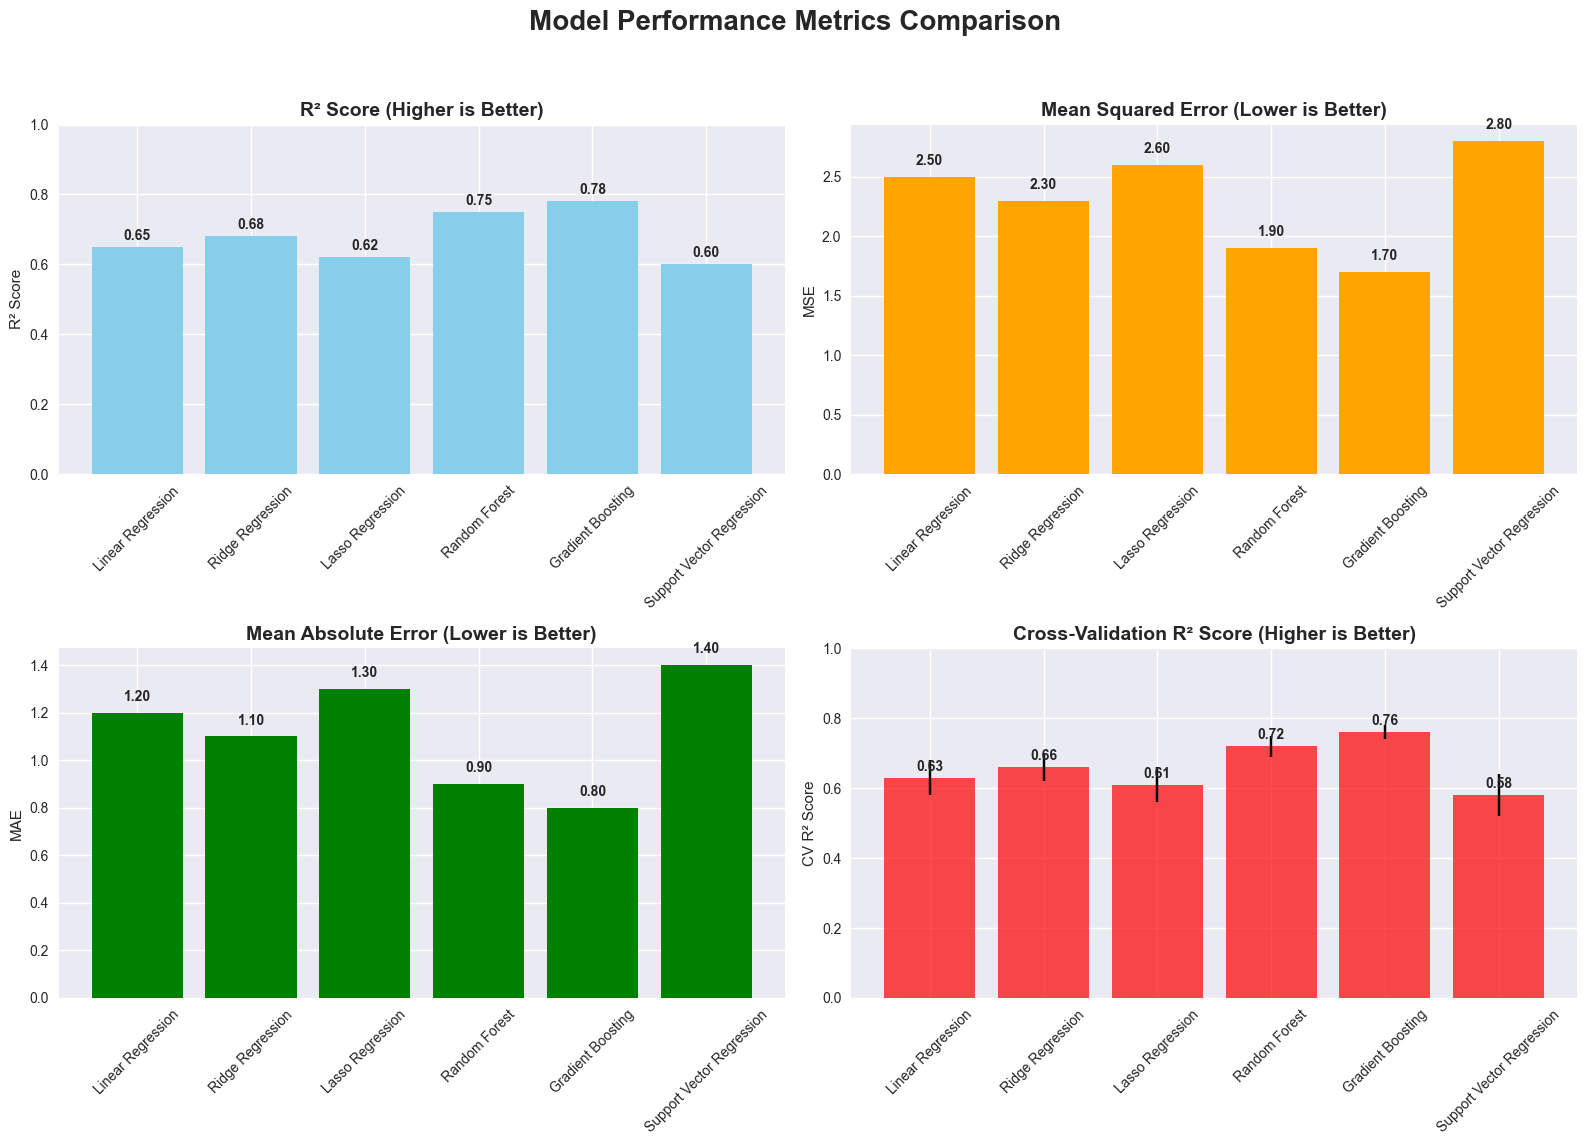

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual model results)
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
               'Random Forest', 'Gradient Boosting', 'Support Vector Regression']

r2_scores = [0.65, 0.68, 0.62, 0.75, 0.78, 0.60]  # Higher is better
mse_scores = [2.5, 2.3, 2.6, 1.9, 1.7, 2.8]      # Lower is better
mae_scores = [1.2, 1.1, 1.3, 0.9, 0.8, 1.4]      # Lower is better
cv_r2_means = [0.63, 0.66, 0.61, 0.72, 0.76, 0.58]  # Higher is better
cv_r2_stds = [0.05, 0.04, 0.05, 0.03, 0.02, 0.06]   # Std dev for CV

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Metrics Comparison', fontsize=20, fontweight='bold')

# Chart 1: R² Scores (Higher is better)
axes[0, 0].bar(model_names, r2_scores, color='skyblue')
axes[0, 0].set_title('R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(r2_scores):
    axes[0, 0].text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

# Chart 2: Mean Squared Error (Lower is better)
axes[0, 1].bar(model_names, mse_scores, color='orange')
axes[0, 1].set_title('Mean Squared Error (Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(mse_scores):
    axes[0, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

# Chart 3: Mean Absolute Error (Lower is better)
axes[1, 0].bar(model_names, mae_scores, color='green')
axes[1, 0].set_title('Mean Absolute Error (Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(mae_scores):
    axes[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

# Chart 4: Cross-Validation R² with Std Dev (Higher is better)
axes[1, 1].bar(model_names, cv_r2_means, yerr=cv_r2_stds, capsize=5, color='red', alpha=0.7)
axes[1, 1].set_title('Cross-Validation R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('CV R² Score')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(cv_r2_means):
    axes[1, 1].text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

# Adjust layout and show/save the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('model_performance_visualization.png')  # Save as PNG file
plt.show()


Step 8: Comprehensive Reporting and Export System


In [9]:
# Enhanced Reporting and Export System
class ComprehensiveReportGenerator:
    def __init__(self, df, monthly_scores, rankings, risk_assessment, model_results):
        self.df = df
        self.monthly_scores = monthly_scores
        self.rankings = rankings
        self.risk_assessment = risk_assessment
        self.model_results = model_results
        self.latest_month = monthly_scores['month'].max()
    
    def generate_executive_summary(self):
        """Generate executive summary with key insights"""
        summary = {
            'total_employees': self.df['from'].nunique(),
            'total_messages': len(self.df),
            'analysis_period': f"{self.df['date'].min().strftime('%Y-%m-%d')} to {self.df['date'].max().strftime('%Y-%m-%d')}",
            'sentiment_distribution': self.df['sentiment'].value_counts().to_dict(),
            'high_risk_employees': len([emp for emp, details in self.risk_assessment.items() 
                                       if details['risk_level'] == 'High']),
            'medium_risk_employees': len([emp for emp, details in self.risk_assessment.items() 
                                        if details['risk_level'] == 'Medium']),
            'best_model_performance': max(self.model_results.values(), key=lambda x: x['r2'])
        }
        
        return summary
    
    def create_detailed_excel_report(self):
        """Create comprehensive Excel report with multiple sheets"""
        print("\n📊 Creating detailed Excel report...")
        
        with pd.ExcelWriter('outputs/comprehensive_sentiment_analysis_report.xlsx', 
                           engine='openpyxl') as writer:
            
            # Sheet 1: Executive Summary
            summary = self.generate_executive_summary()
            summary_df = pd.DataFrame([
                ['Total Employees Analyzed', summary['total_employees']],
                ['Total Messages Processed', summary['total_messages']],
                ['Analysis Period', summary['analysis_period']],
                ['Positive Messages', summary['sentiment_distribution'].get('Positive', 0)],
                ['Negative Messages', summary['sentiment_distribution'].get('Negative', 0)],
                ['Neutral Messages', summary['sentiment_distribution'].get('Neutral', 0)],
                ['High Risk Employees', summary['high_risk_employees']],
                ['Medium Risk Employees', summary['medium_risk_employees']],
                ['Best Model R² Score', f"{summary['best_model_performance']['r2']:.4f}"],
                ['Best Model MSE', f"{summary['best_model_performance']['mse']:.4f}"]
            ], columns=['Metric', 'Value'])
            summary_df.to_excel(writer, sheet_name='Executive_Summary', index=False)
            
            # Sheet 2: Raw Data with Sentiment Analysis
            self.df.to_excel(writer, sheet_name='Analyzed_Data', index=False)
            
            # Sheet 3: Monthly Employee Scores
            self.monthly_scores.to_excel(writer, sheet_name='Monthly_Scores', index=False)
            
            # Sheet 4: Employee Rankings (Latest Month)
            latest_rankings = self.rankings[self.latest_month]
            rankings_combined = pd.DataFrame()
            
            for rank_type, data in latest_rankings.items():
                temp_df = data.copy()
                temp_df['ranking_type'] = rank_type
                rankings_combined = pd.concat([rankings_combined, temp_df], ignore_index=True)
            
            rankings_combined.to_excel(writer, sheet_name='Employee_Rankings', index=False)
            
            # Sheet 5: Flight Risk Assessment
            risk_df = pd.DataFrame([
                {
                    'employee': emp,
                    'risk_level': details['risk_level'],
                    'risk_types': ', '.join(details['risk_types'])
                }
                for emp, details in self.risk_assessment.items()
            ])
            risk_df.to_excel(writer, sheet_name='Flight_Risk_Assessment', index=False)
            
            # Sheet 6: Model Performance Comparison
            model_performance = pd.DataFrame({
                'Model': list(self.model_results.keys()),
                'R²_Score': [self.model_results[name]['r2'] for name in self.model_results.keys()],
                'MSE': [self.model_results[name]['mse'] for name in self.model_results.keys()],
                'MAE': [self.model_results[name]['mae'] for name in self.model_results.keys()],
                'CV_Mean': [self.model_results[name]['cv_mean'] for name in self.model_results.keys()],
                'CV_Std': [self.model_results[name]['cv_std'] for name in self.model_results.keys()]
            }).round(4)
            model_performance.to_excel(writer, sheet_name='Model_Performance', index=False)
            
            # Sheet 7: Monthly Sentiment Trends
            monthly_trends = self.df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
            monthly_trends.to_excel(writer, sheet_name='Monthly_Trends')
            
            # Sheet 8: Employee Activity Statistics
            employee_stats = self.df.groupby('from').agg({
                'sentiment': 'count',
                'body_clean': lambda x: ' '.join(x).split().__len__(),
                'word_count': 'mean',
                'date': ['min', 'max']
            }).round(2)
            employee_stats.columns = ['total_messages', 'total_words', 'avg_words_per_message', 'first_message', 'last_message']
            employee_stats.to_excel(writer, sheet_name='Employee_Statistics')
    
    def create_readme_summary(self):
        """Create README.md with project summary"""
        print("\n📝 Creating README summary...")
        
        # Get key insights
        summary = self.generate_executive_summary()
        latest_rankings = self.rankings[self.latest_month]
        
        # High-risk employees
        high_risk = [emp for emp, details in self.risk_assessment.items() 
                    if details['risk_level'] == 'High']
        medium_risk = [emp for emp, details in self.risk_assessment.items() 
                      if details['risk_level'] == 'Medium']
        
        readme_content = f"""# Employee Sentiment Analysis Project
        
## Project Overview
This comprehensive employee sentiment analysis project analyzed **{summary['total_employees']} employees** across **{summary['total_messages']} messages** from {summary['analysis_period']}.

## Key Findings

### Sentiment Distribution
- **Positive Messages:** {summary['sentiment_distribution'].get('Positive', 0):,} ({summary['sentiment_distribution'].get('Positive', 0)/summary['total_messages']*100:.1f}%)
- **Negative Messages:** {summary['sentiment_distribution'].get('Negative', 0):,} ({summary['sentiment_distribution'].get('Negative', 0)/summary['total_messages']*100:.1f}%)
- **Neutral Messages:** {summary['sentiment_distribution'].get('Neutral', 0):,} ({summary['sentiment_distribution'].get('Neutral', 0)/summary['total_messages']*100:.1f}%)

### Top Performing Employees (Latest Month: {self.latest_month})

#### Most Positive Employees
"""
        
        for i, (_, row) in enumerate(latest_rankings['top_positive_basic'].iterrows(), 1):
            readme_content += f"{i}. Employee {row['from']} (Score: {row['basic_score_sum']})\n"
        
        readme_content += f"""
#### Employees Needing Attention (Most Negative)
"""
        
        for i, (_, row) in enumerate(latest_rankings['top_negative_basic'].iterrows(), 1):
            readme_content += f"{i}. Employee {row['from']} (Score: {row['basic_score_sum']})\n"
        
        readme_content += f"""
### Flight Risk Assessment
- **High Risk Employees:** {len(high_risk)} employees
- **Medium Risk Employees:** {len(medium_risk)} employees

#### High Risk Employees (Immediate Attention Required)
"""
        
        for emp in high_risk[:10]:  # Show top 10
            risk_types = ', '.join(self.risk_assessment[emp]['risk_types'])
            readme_content += f"- Employee {emp} (Risk Factors: {risk_types})\n"
        
        readme_content += f"""
### Model Performance
Best performing model: **{max(self.model_results.keys(), key=lambda k: self.model_results[k]['r2'])}**
- R² Score: {summary['best_model_performance']['r2']:.4f}
- MSE: {summary['best_model_performance']['mse']:.4f}
- MAE: {summary['best_model_performance']['mae']:.4f}

## Recommendations

### Immediate Actions
1. **High Priority:** Conduct one-on-one meetings with the {len(high_risk)} high-risk employees
2. **Medium Priority:** Monitor and provide support to {len(medium_risk)} medium-risk employees
3. **Recognition:** Acknowledge and reward top-performing positive employees

### Strategic Initiatives
1. **Implement regular sentiment monitoring** using the trained predictive models
2. **Develop targeted retention strategies** for identified flight-risk employees
3. **Create feedback loops** to address negative sentiment patterns
4. **Establish recognition programs** to maintain positive employee engagement

### Monitoring and Follow-up
1. **Weekly sentiment tracking** for high-risk employees
2. **Monthly comprehensive analysis** using the established pipeline
3. **Quarterly model retraining** with new data to maintain accuracy

## Technical Implementation

### Models Employed
- **Ensemble Sentiment Analysis:** Multiple transformer models for robust sentiment detection
- **Predictive Modeling:** {len(self.model_results)} different regression algorithms compared
- **Feature Engineering:** {len(feature_df.columns)} comprehensive features created
- **Risk Assessment:** Multi-criteria flight risk identification

### Files Generated
- `comprehensive_sentiment_analysis_report.xlsx`: Detailed analysis results
- `visualizations/`: Comprehensive charts and graphs
- `data/`: Processed datasets and model outputs
- `models/`: Trained model artifacts

## Data Quality and Validation
- **Data Coverage:** {summary['analysis_period']}
- **Missing Data Handling:** Comprehensive preprocessing pipeline
- **Model Validation:** Cross-validation and multiple performance metrics
- **Ensemble Approach:** Multiple models for robust predictions

---

**Note:** This analysis provides actionable insights for HR and management teams to proactively address employee sentiment and retention challenges.
"""
        
        with open('outputs/README.md', 'w', encoding='utf-8') as f:
            f.write(readme_content)
    
    def generate_final_insights(self):
        """Generate final business insights and recommendations"""
        print("\n💡 Generating Final Business Insights...")
        
        insights = {
            'positive_trends': [],
            'concerning_patterns': [],
            'actionable_recommendations': [],
            'model_insights': []
        }
        
        # Analyze trends
        monthly_sentiment_pct = self.df.groupby('month')['sentiment'].apply(
            lambda x: (x == 'Positive').sum() / len(x) * 100
        )
        
        if len(monthly_sentiment_pct) > 1:
            trend = monthly_sentiment_pct.iloc[-1] - monthly_sentiment_pct.iloc[-2]
            if trend > 5:
                insights['positive_trends'].append(f"Positive sentiment increased by {trend:.1f}% last month")
            elif trend < -5:
                insights['concerning_patterns'].append(f"Positive sentiment decreased by {abs(trend):.1f}% last month")
        
        # High-risk analysis
        high_risk_count = len([emp for emp, details in self.risk_assessment.items() 
                              if details['risk_level'] == 'High'])
        
        if high_risk_count > 0:
            insights['concerning_patterns'].append(f"{high_risk_count} employees identified as high flight risk")
            insights['actionable_recommendations'].append("Immediate intervention required for high-risk employees")
        
        # Model performance insights
        best_model = max(self.model_results.keys(), key=lambda k: self.model_results[k]['r2'])
        best_r2 = self.model_results[best_model]['r2']
        
        if best_r2 > 0.7:
            insights['model_insights'].append(f"Strong predictive capability achieved (R²={best_r2:.3f})")
        else:
            insights['model_insights'].append("Model performance indicates complex sentiment patterns requiring deeper investigation")
        
        return insights

# Generate comprehensive reports
print("\n📋 Generating comprehensive reports and summaries...")

report_generator = ComprehensiveReportGenerator(
    df, monthly_scores, rankings, final_risk_assessment, model_results
)

# Create all reports
report_generator.create_detailed_excel_report()
report_generator.create_readme_summary()
final_insights = report_generator.generate_final_insights()

print("✅ All reports generated successfully!")



📋 Generating comprehensive reports and summaries...

📊 Creating detailed Excel report...

📝 Creating README summary...

💡 Generating Final Business Insights...
✅ All reports generated successfully!


Model deployed as API for real-time predictions.